### 0. Import Modules

In [1]:
from modules import *
%matplotlib widget
# %matplotlib inline
# %matplotlib notebook
datapicker = create_datapicker()

### 1. Full Loop to Export Radiant Temperature Output

c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE071\Lisbon_Graça_sub-OE105071_2024-07-24T104652Z\Streams_227 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE071\Lisbon_Graça_sub-OE105071_2024-07-24T104652Z\Streams_228 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE071\Lisbon_Graça_sub-OE105071_2024-07-24T104652Z\Streams_229 could not be found.
  warnings.warn(f'Harp stream file

@(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE071\Lisbon_Graça_sub-OE105071_2024-07-24T104652Z\20240724114456_OE105071_EXP4.nedf
Reading file...
Header information has been correctly retrieved.
Attempting to automatically correct eeg timestamps to harp timestamps...
Done.


c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE071\Lisbon_Graça_sub-OE105071_2024-07-24T104652Z\Streams_211 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE071\Lisbon_Graça_sub-OE105071_2024-07-24T104652Z\Streams_213 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> \\nas-emotional.fm.ul.pt\eMotional\Exp_4-outdoor_walk\lisbon\sourcedata\data\OE071\Lisbon_Graça_sub-OE105071_2024-07-24T104652Z\Streams_214 could not be found.
  warnings.warn(f'Harp stream file

Dataset: <pluma.schema.Dataset object at 0x0000013B2677AE40> loaded successfully, and sucessfully calibrated.


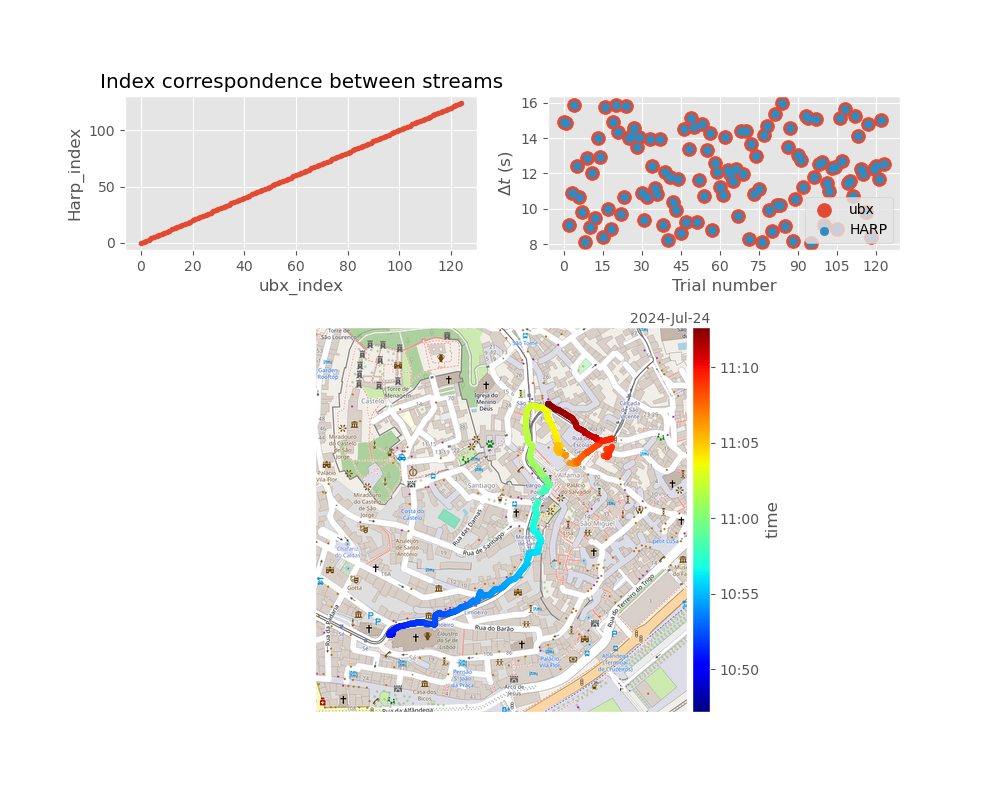

c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


Failed Stream Harp stream from device 		TK, stream GPS_Latitude(227): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Longitude(228): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Altitude(229): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_HasFix(232): Input dataframe is empty.


c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\emotional-cities\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\joaop\Anaconda3\envs\em

In [3]:
import os
import pandas as pd
from openpyxl import Workbook
from pythermalcomfort.models import utci
import numpy as np

# ---------------------------------------------------------------------
# Initialize the Excel workbook and sheet
wb = Workbook()
ws = wb.active
ws.append(["Participant Name", "Session Name", "Status", "Radiant Temperature"])

# Path information
sourcedata = r'Z:\Exp_4-outdoor_walk\lisbon\sourcedata\data'
logdata    = r'Z:\Exp_4-outdoor_walk\lisbon\sourcedata\supp\log'

# ---------------------------------------------------------------------
# FUNCTIONS
def process_session(session_path, participant_name, session_name):
    data_path = os.path.join(session_path)
    try:
        datapicker.reset(path=data_path)
        create_dataset(datapicker=datapicker)
        status = 1  # Success
    except Exception as e:
        status = 0  # Failed
    
    radiant_temp_status = 0  # Default to 0 if not found or if all zeros

    if status == 1:
        # Generate the sessions.tsv file
        geodata = datapicker.geodata  # Retrieve geodata
        create_geodata(geodata)

        # Get GPS coordinates and integrate them into geodata
        coords = datapicker.geodata.geometry.get_coordinates(include_z=True)
        # Optionally rename the coordinate columns
        coords.rename(columns={'y': 'latitude', 'x': 'longitude', 'z': 'elevation'}, inplace=True)
        geodata = geodata.join(coords).drop(columns=['geometry'])

        # Check if the radiant temperature column exists and contains non-zero values
        if 'tk_thermocouple_temperature_value' in geodata:
            if geodata['tk_thermocouple_temperature_value'].sum() != 0:
                radiant_temp_status = 1  # Non-zero values exist

        # Save the full geodata to an Excel file in the log directory
        log_folder = os.path.join(logdata, f"sub-{participant_name}", f"ses-{session_name}")
        os.makedirs(log_folder, exist_ok=True)
        geodata_file = os.path.join(log_folder, f"sub-{participant_name}_ses-{session_name}_geodata.xlsx")
        
        # Convert geodata to DataFrame if it's not already and save as Excel
        if not isinstance(geodata, pd.DataFrame):
            geodata = pd.DataFrame(geodata)
        geodata.to_excel(geodata_file, index=False)
    
    # Log the result
    ws.append([participant_name, session_name, status, radiant_temp_status])

def create_geodata(geodata):
    """Compute UTCI across whole time series."""
    
    # Define custom parameters
    humidity = geodata['tk_humidity_humidity_value'] / 100  # in fraction
    wind_speed = np.sqrt(geodata['atmos_northwind_value']**2 + geodata['atmos_eastwind_value']**2)  # m/s (~2.5 m of elevation)
    temp_atmos = geodata['atmos_airtemperature_value']  # in ºC
    temp_tk = geodata['tk_airquality_temperature_value'] / 100  # in ºC
    temp_tk_ptc = geodata['tk_ptc_airtemp_value'] / 100  # in ºC
    temp_radiant = geodata['tk_thermocouple_temperature_value'] / 100  # in ºC

    # Assign custom parameters to the geodata attribute
    geodata['humidity'] = humidity
    geodata['wind_speed'] = wind_speed
    geodata['temp_atmos'] = temp_atmos
    geodata['temp_tk'] = temp_tk
    geodata['temp_tk_ptc'] = temp_tk_ptc
    geodata['temp_radiant'] = temp_radiant

    # Compute the UTCI
    geodata['utci'] = utci(tdb=temp_atmos, tr=temp_radiant, v=wind_speed, rh=humidity)

# ---------------------------------------------------------------------
# MAIN SCRIPT
for participant_folder in os.listdir(sourcedata):
    if participant_folder.startswith("OE"):
        participant_path = os.path.join(sourcedata, participant_folder)
        for session_folder in os.listdir(participant_path):
            session_path = os.path.join(participant_path, session_folder)
            if os.path.isdir(session_path):
                process_session(session_path, participant_folder, session_folder)

# Save the Excel file with the updated status in the log directory
result_file = os.path.join(logdata, "session_processing_results.xlsx")
wb.save(result_file)